# CatBoost sobre las importaciones de cítricos

En este notebook se entrenará un modelo para cada país objeto de nuestro estudio que prediga su importación total de cítricos a un año vista. 

Después, se entrenará un modelo que, de nuevo para cada país objeto de nuestro estudio, prediga cuánto importará de cada uno de sus principales partners. 

In [92]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [36]:
paises_objetivo = ['Germany','France','Italy','Netherlands','Poland'] # Estos son los países seleccionados

# Importación total de cítricos por país

## Entrenamiento de los modelos

Aquí vamos a crear un modelo que prevea la importación total de cítricos para cada país objeto de estudio.

MODELO DE GERMANY


,Variable,Importancia
0,Semana,"118,069.61"
1,Mes,"60,071.80"
3,Temperatura,"37,485.35"
2,Precipitación,"25,178.59"
11,Masc. Adolescentes (15-19 años),"9,465.47"
16,PIB per capita,"9,460.50"
14,Masc. Adultos mayores (55-74 años),"9,236.58"
12,Masc. Adultos jóvenes (20-34 años),"8,643.91"
4,Fem. Niños (5-14 años),"7,849.99"
7,Fem. Adultos medios (35-54 años),"7,731.64"


'Media de importación: 486,235.67, Desviación estándar de test: 189,467.66, RMSE: 292,051.18'

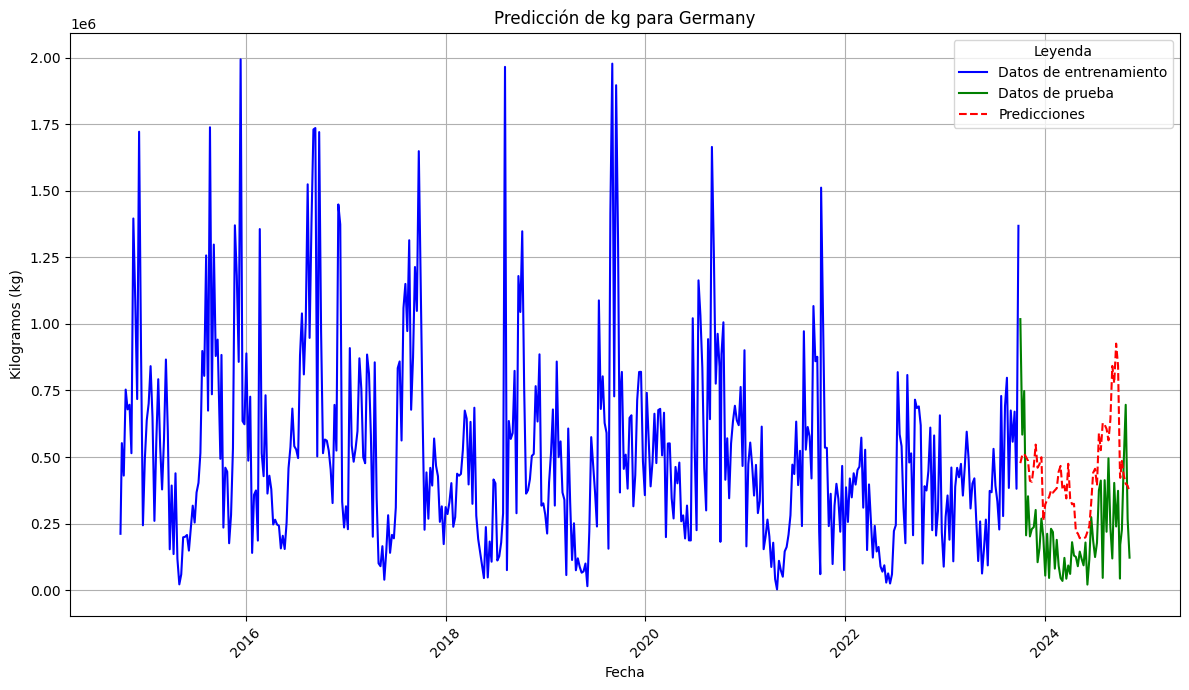

MODELO DE FRANCE


,Variable,Importancia
0,Semana,"771,798.09"
3,Temperatura,"536,791.97"
1,Mes,"430,649.76"
2,Precipitación,"52,673.00"
13,Masc. Adultos medios (35-54 años),"48,040.53"
10,Masc. Niños (5-14 años),"30,880.71"
6,Fem. Adultos jóvenes (20-34 años),"26,224.94"
16,PIB per capita,"25,381.37"
12,Masc. Adultos jóvenes (20-34 años),"24,138.83"
17,Año,"24,030.90"


'Media de importación: 2,901,722.33, Desviación estándar de test: 1,456,104.69, RMSE: 1,133,997.89'

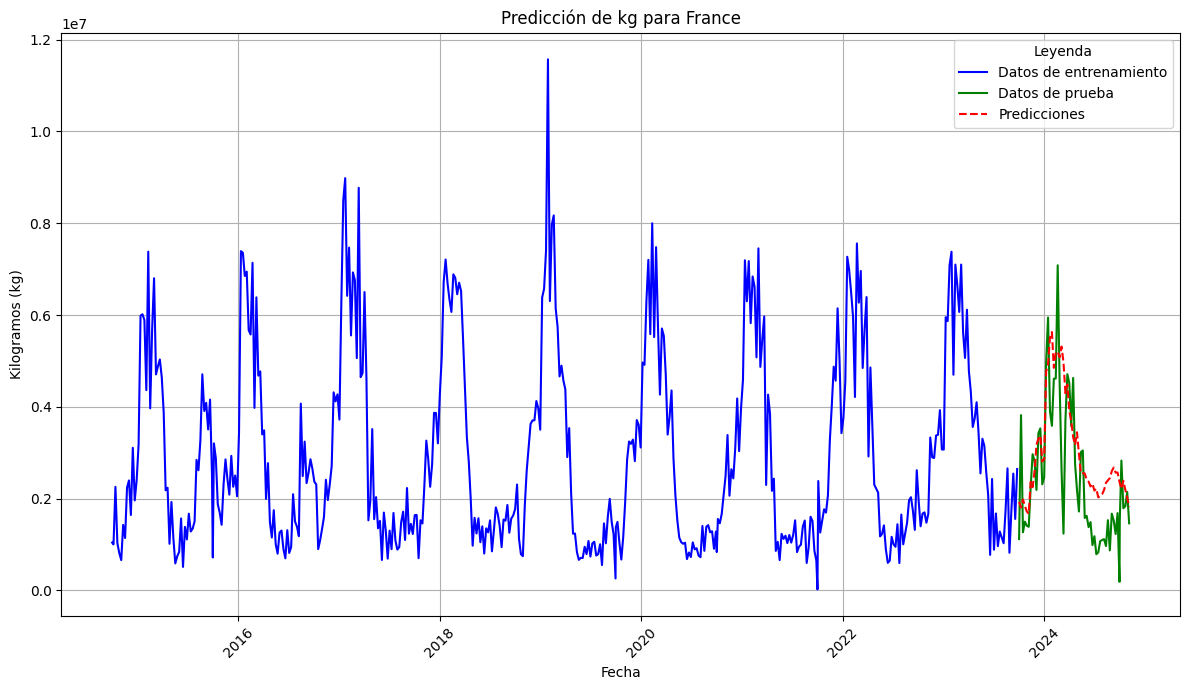

MODELO DE ITALY


,Variable,Importancia
3,Temperatura,"906,174.92"
0,Semana,"787,745.39"
1,Mes,"264,195.16"
2,Precipitación,"124,355.10"
15,Masc. Ancianos (75+ años),"59,172.88"
9,Fem. Ancianos (75+ años),"40,969.65"
5,Fem. Adolescentes (15-19 años),"37,513.01"
11,Masc. Adolescentes (15-19 años),"34,740.42"
16,PIB per capita,"33,513.38"
12,Masc. Adultos jóvenes (20-34 años),"32,791.13"


'Media de importación: 2,345,316.77, Desviación estándar de test: 2,421,295.16, RMSE: 1,930,725.43'

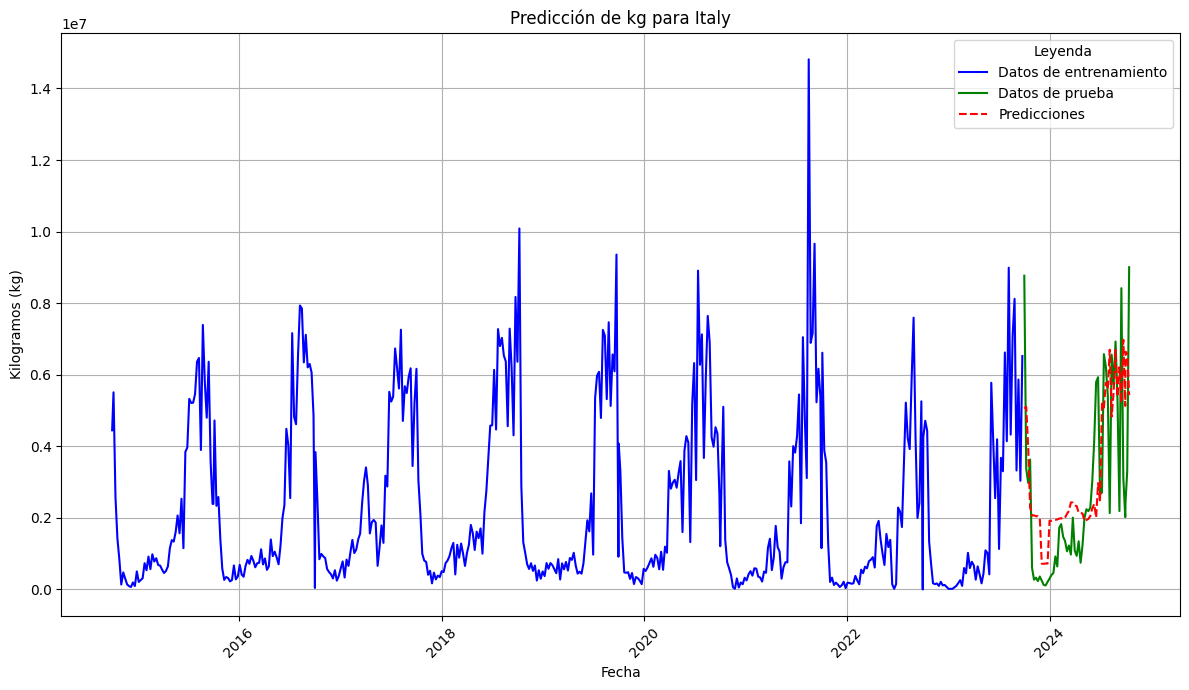

MODELO DE NETHERLANDS


,Variable,Importancia
0,Semana,"3,934,083.54"
3,Temperatura,"3,411,577.76"
1,Mes,"1,754,705.89"
2,Precipitación,"677,612.79"
6,Fem. Adultos jóvenes (20-34 años),"188,264.90"
17,Año,"171,392.19"
8,Fem. Adultos mayores (55-74 años),"171,092.22"
12,Masc. Adultos jóvenes (20-34 años),"171,004.66"
16,PIB per capita,"161,571.55"
4,Fem. Niños (5-14 años),"157,505.64"


'Media de importación: 17,156,720.02, Desviación estándar de test: 13,027,045.15, RMSE: 9,940,024.68'

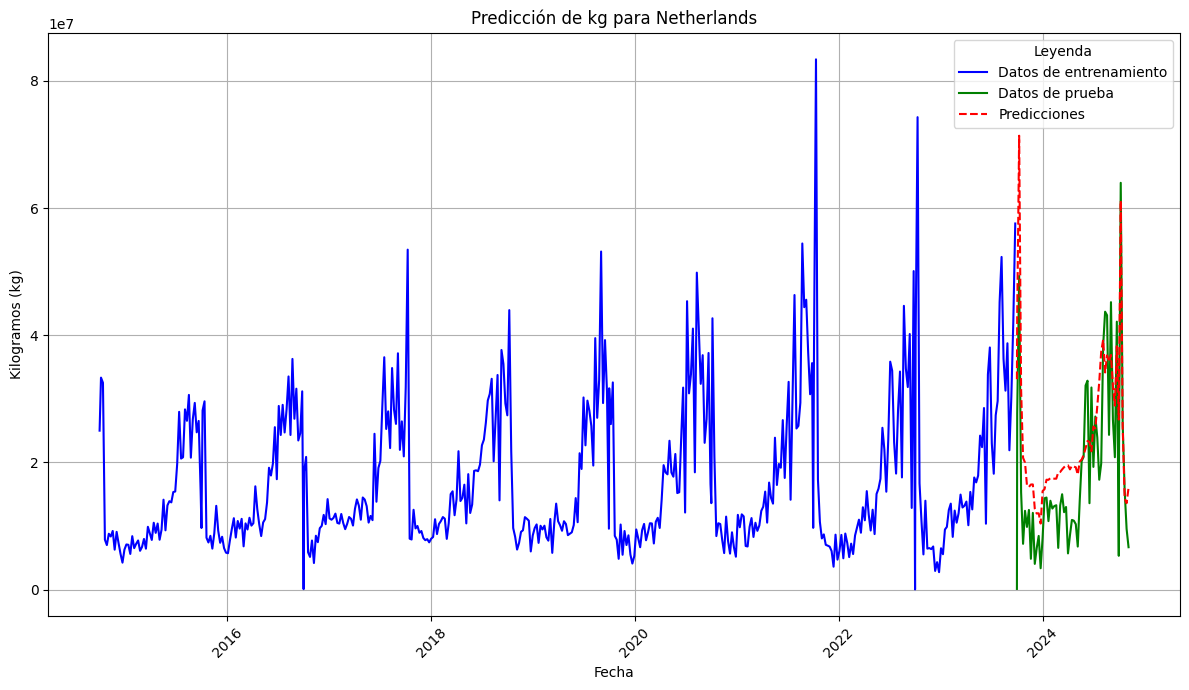

MODELO DE POLAND


,Variable,Importancia
3,Temperatura,"256,765.30"
0,Semana,"216,654.49"
1,Mes,"47,491.99"
2,Precipitación,"45,318.72"
14,Masc. Adultos mayores (55-74 años),"20,800.36"
7,Fem. Adultos medios (35-54 años),"19,402.77"
6,Fem. Adultos jóvenes (20-34 años),"18,532.47"
15,Masc. Ancianos (75+ años),"17,762.29"
12,Masc. Adultos jóvenes (20-34 años),"17,564.88"
16,PIB per capita,"17,542.82"


'Media de importación: 899,799.55, Desviación estándar de test: 1,059,583.93, RMSE: 1,194,170.15'

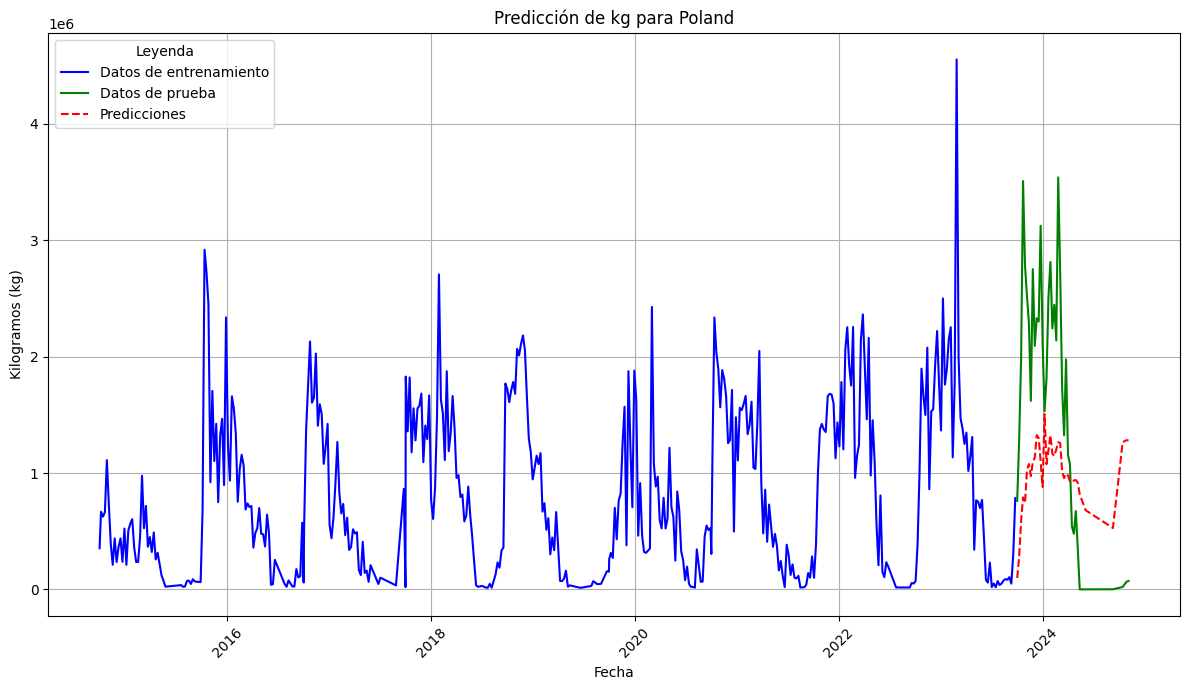

In [66]:
models = {} # Guardaremos los modelos en este diccionario

for pais in paises_objetivo:
    print(f'MODELO DE {pais.upper()}')
    df = pd.read_csv(f'./Countries_citricos_completos/{pais}.csv') # Cargamos el dataset
    
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.groupby(['Date']).agg({    # Agrupamos por fecha
                    'kg':'sum', 
                    **{col: 'first' for col in df.columns if col not in ['Date', 'kg']}
                    }).reset_index()
    df.drop(columns=['Euro Value','Unit Value','Año','Member State','Partner','Product'], inplace=True)
    df = df.loc[df['kg'] > 500, :] # Filtramos outliers

    df['Año'] = df['Date'].dt.year
    df['Mes'] = df['Date'].dt.month
    df['Semana'] = df['Date'].dt.isocalendar().week

    df_metricas = pd.DataFrame({pais:['RMSE','R2']})
    metricas = {}

    # Separamos los datos en entrenamiento y test

    df_train = df.loc[df['Date'] < '2023-10-01', :]
    df_test = df.loc[df['Date'] >= '2023-10-01', :] 

    X_train = df_train.drop(columns=['Date', 'kg'])
    y_train = df_train['kg']

    X_test = df_test.drop(columns=['Date', 'kg'])
    y_test = df_test['kg']
    
    # Creamos y entrenamos el modelo
    modelo = CatBoostRegressor(iterations=1500, depth=6, learning_rate=0.04, loss_function='RMSE', l2_leaf_reg=7, subsample=0.9,
                               random_seed=42, verbose=False)
    modelo.fit(X_train, y_train)

    # Analizamos la importancia de cada variable
    shap_importance = modelo.get_feature_importance(Pool(X_train, label=y_train), type='ShapValues')
    global_importance = (np.abs(shap_importance)[:,:-1].mean(axis=0)).round(2)
    display(pd.DataFrame({'Variable': X_train.columns, 'Importancia': global_importance}).sort_values(by='Importancia', ascending=False))

    models[pais] = modelo # Guardamos el modelo en el diccionario
    
    y_pred = modelo.predict(X_test) # Realizamos predicciones

    # Evaluamos el modelo
    media_importacion = df['kg'].mean()
    std_test = y_test.std()
    rmse = root_mean_squared_error(y_test, y_pred) 
    #r2 = r2_score(y_test, y_pred)
    display(f'Media de importación: {media_importacion:,.2f}, Desviación estándar de test: {std_test:,.2f}, RMSE: {rmse:,.2f}')
    #display(f'R2: {r2}')

    # Visualizamos los resultados
    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.plot(df_train['Date'], df_train['kg'], color='blue', label='Datos de entrenamiento')
    ax.plot(df_test['Date'], df_test['kg'], color='green', label='Datos de prueba')
    ax.plot(df_test['Date'], y_pred, color='red', linestyle='--', label='Predicciones')
    
    ax.set_title(f'Predicción de kg para {pais}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Kilogramos (kg)')
    ax.legend(title='Leyenda', loc = 'best')
    ax.grid(True)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

## Predicciones de temperatura y precipitación
Aquí creamos una función para predecir los datos de temperatura y precipitación teniendo en cuenta el cambio climático. 

In [70]:
def prevision_clima(df):
    # Extraemos el histórico de datos de clima
    df_clima = df.copy()
    df_clima = df_clima[['Semana', 'Mes', 'Temperatura', 'Precipitación']]

    fechas_futuras = pd.date_range(start='2024-11-11', end='2026-10-31', freq='W')

    # Creamos un dataframe para las previsiones a 1 año vista
    df_prevision_clima = pd.DataFrame({'Date': fechas_futuras})
    df_prevision_clima['Semana'] = df_prevision_clima['Date'].dt.isocalendar().week
    df_prevision_clima['Mes'] = df_prevision_clima['Date'].dt.month
    df_prevision_clima['Año'] = df_prevision_clima['Date'].dt.year

    # Calculamos las medias de cada mes durante los años disponibles
    medias_temperatura = df_clima.groupby('Mes')['Temperatura'].mean()
    medias_precipitacion = df_clima.groupby('Mes')['Precipitación'].mean()

    # Asignamos las medias a las previsiones
    df_prevision_clima['Temperatura'] = df_prevision_clima['Mes'].map(medias_temperatura)
    df_prevision_clima['Precipitación'] = df_prevision_clima['Mes'].map(medias_precipitacion)

    # Definimos cómo cambiarán las temperaturas y precipitaciones
    ajustes_temperatura = {
        2025: {1: 0.4, 2: 0.3, 3: 0.4, 4: 0.7, 5: 1.0, 6: 0.6, 7: 1.2, 8: 1.1, 9: 0.2, 10: -0.2, 11: -0.1, 12: 0.4},
        2026: {1: 0.8, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.4, 6: 1.2, 7: 1.2, 8: 1.0, 9: 0.4, 10: 0.2, 11: 0.6, 12: -0.3}
    }

    ajustes_precipitacion = {
        2025: {1: -10, 2: -15, 3: -20, 4: 13, 5: -14, 6: -18, 7: -23, 8: -20, 9: 10, 10: 16, 11: -5, 12: -8},
        2026: {1: -5, 2: -14, 3: 10, 4: 18, 5: -10, 6: -23, 7: -20, 8: -15, 9: 15, 10: 13, 11: 5, 12: -10}
    }

    # Aplicamos los ajustes manuales y añadimos un pequeño ruido aleatorio para mayor realismo
    for year in [2025, 2026]:
        for month in range(1, 13):
            df_prevision_clima.loc[
                (df_prevision_clima['Año'] == year) & (df_prevision_clima['Mes'] == month), 'Temperatura'
            ] += ajustes_temperatura[year][month] + np.random.uniform(-0.2, 0.2)

            df_prevision_clima.loc[
                (df_prevision_clima['Año'] == year) & (df_prevision_clima['Mes'] == month), 'Precipitación'
            ] += ajustes_precipitacion[year][month] + np.random.uniform(-10, 10)
    
    return df_prevision_clima


## Predicciones demográficas y de PIB per capita
Aquí vamos a crear una función para predecir los valores anuales de las variables demográficas y de PIB per capita. Haremos uso de un modelo de regresión lineal.

In [71]:
def prevision_demo(df):
   df_demo = df.copy()
   df_demo = df_demo[['Año','Fem. Niños (5-14 años)',
       'Fem. Adolescentes (15-19 años)', 'Fem. Adultos jóvenes (20-34 años)',
       'Fem. Adultos medios (35-54 años)', 'Fem. Adultos mayores (55-74 años)',
       'Fem. Ancianos (75+ años)', 'Masc. Niños (5-14 años)',
       'Masc. Adolescentes (15-19 años)', 'Masc. Adultos jóvenes (20-34 años)',
       'Masc. Adultos medios (35-54 años)',
       'Masc. Adultos mayores (55-74 años)', 'Masc. Ancianos (75+ años)',
       'PIB per capita']]

   fechas_futuras = pd.date_range(start='2024-11-11', end='2026-10-31', freq='W')

   # Creamos un dataframe para las previsiones a 1 año vista
   df_prevision_demo = pd.DataFrame({'Date': fechas_futuras})
   df_prevision_demo['Semana'] = df_prevision_demo['Date'].dt.isocalendar().week
   df_prevision_demo['Mes'] = df_prevision_demo['Date'].dt.month
   df_prevision_demo['Año'] = df_prevision_demo['Date'].dt.year

    
   datos_anuales = df_demo.groupby('Año').mean().reset_index()

   variables = datos_anuales.columns.difference(['Año'])

   for variable in variables:
      X = datos_anuales[['Año']]
      y = datos_anuales[variable]

      modelo = LinearRegression()
      modelo.fit(X, y)

      df_prevision_demo[variable] = modelo.predict(df_prevision_demo[['Año']])

   df_prevision_demo = df_prevision_demo.round(0)
   
   return df_prevision_demo


## Predicciones de importación total 
Ahora que ya tenemos los modelos entrenados y vemos que más o menos se ajustan bien, vamos a usarlos para hacer las predicciones de importación.

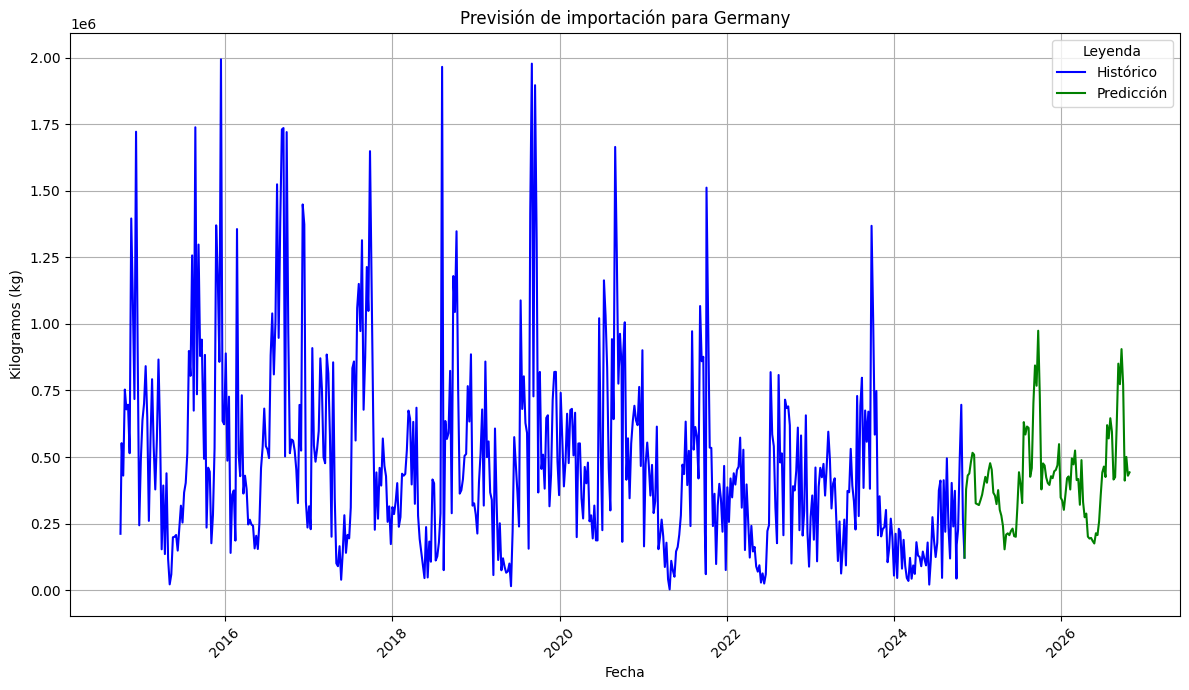

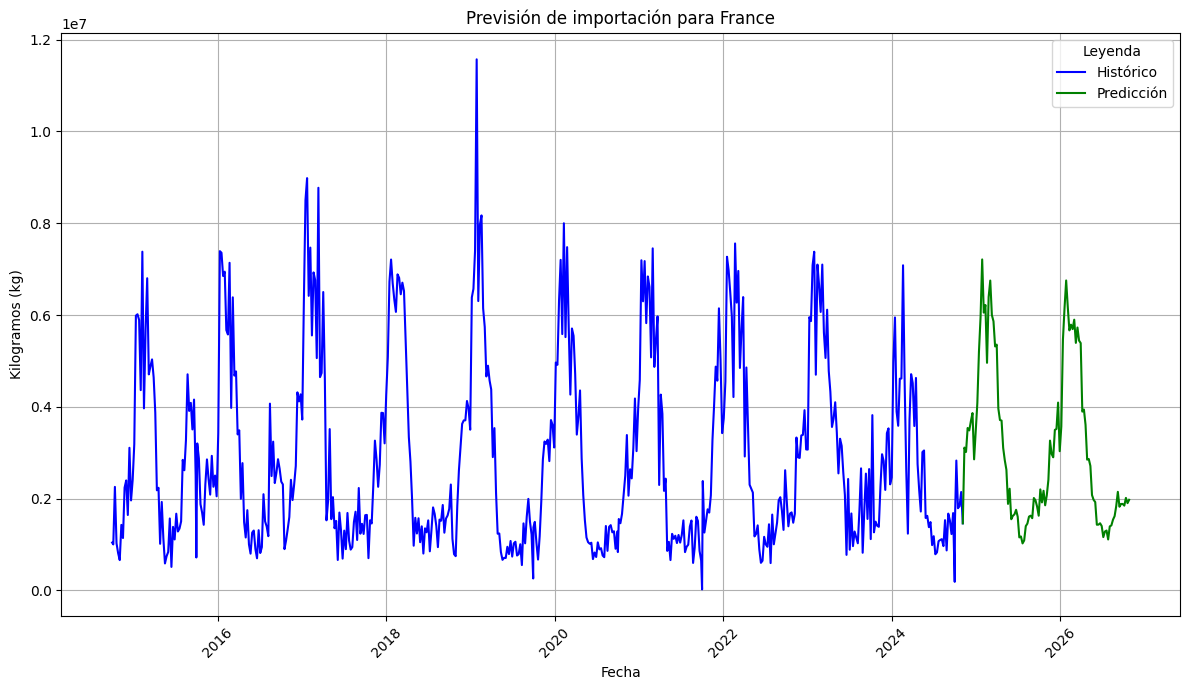

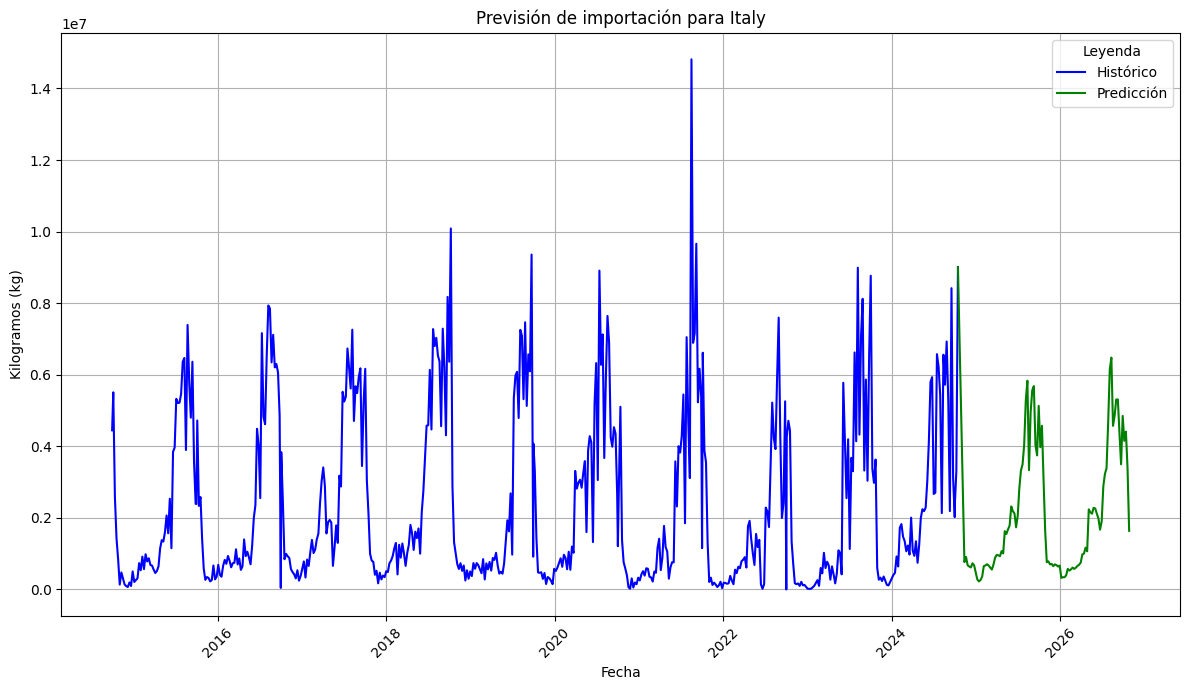

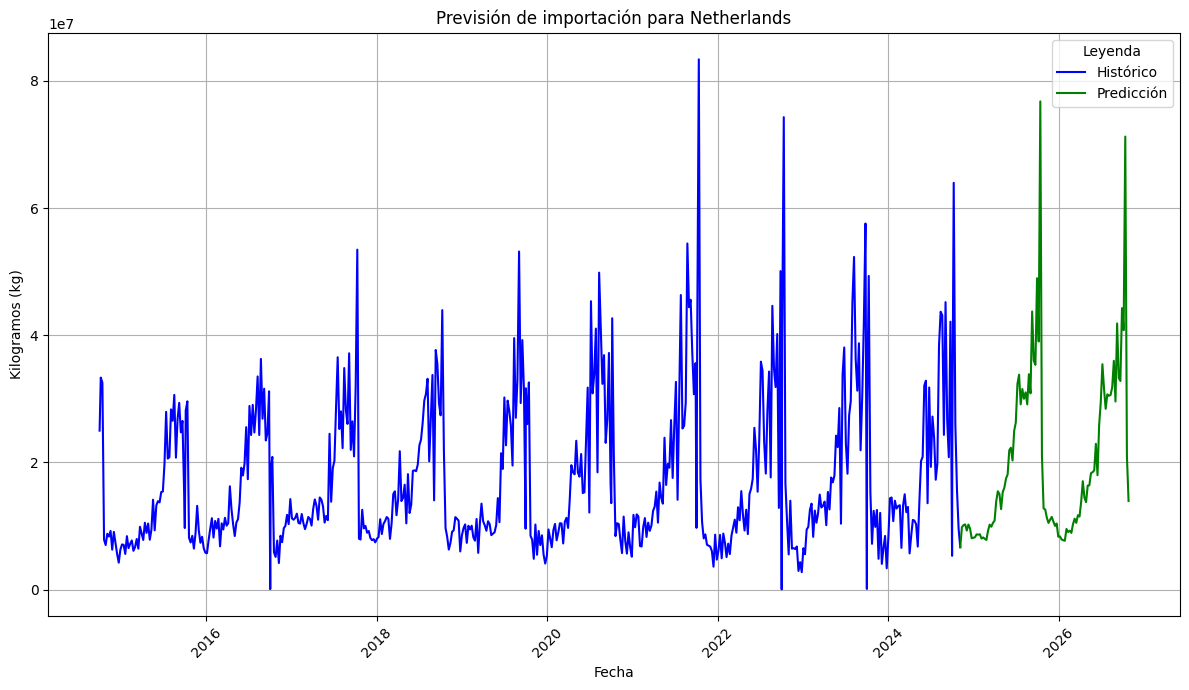

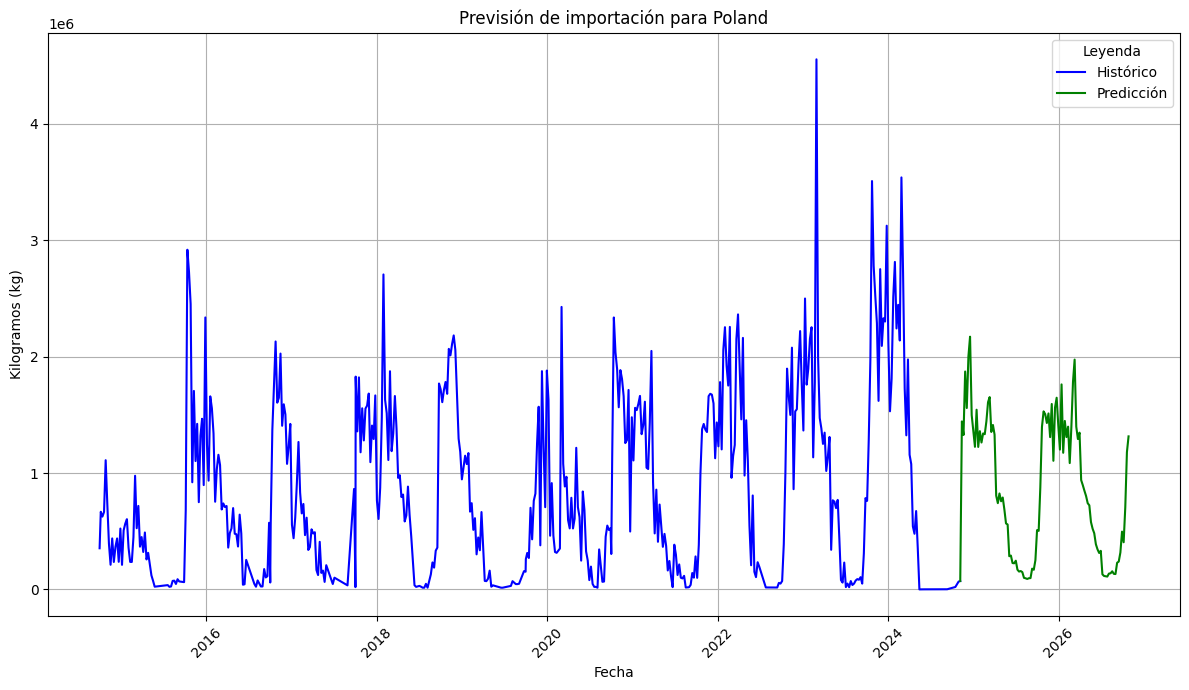

In [73]:
graficos = {} # Guardaremos los gráficos en este diccionario

for pais in paises_objetivo:
    df = pd.read_csv(f'./Countries_citricos_completos/{pais}.csv') # Cargamos los datos del país
    modelo = models[pais] # Seleccionamos el modelo del país
    
    clima_pred = prevision_clima(df) # Predecimos el clima
    demo_pred = prevision_demo(df) # Predecimos la demografía
    clima_pred.drop(columns=['Date'], inplace=True)
    demo_pred.drop(columns=['Date'], inplace=True)
    
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.groupby(['Date']).agg({
                    'kg':'sum',
                    **{col: 'first' for col in df.columns if col not in ['Date', 'kg']}
                    }).reset_index()
    df.drop(columns=['Euro Value','Unit Value','Año','Member State','Partner','Product'], inplace=True)
    df = df.loc[df['kg'] > 500, :] # Filtramos outliers
    
    X_futuro = clima_pred.merge(demo_pred, on=['Semana', 'Mes', 'Año'])
    X_futuro = X_futuro[['Precipitación','Temperatura','Fem. Adolescentes (15-19 años)', 'Fem. Adultos jóvenes (20-34 años)',
       'Fem. Adultos mayores (55-74 años)', 'Fem. Adultos medios (35-54 años)',
       'Fem. Ancianos (75+ años)', 'Fem. Niños (5-14 años)',
       'Masc. Adolescentes (15-19 años)', 'Masc. Adultos jóvenes (20-34 años)',
       'Masc. Adultos mayores (55-74 años)',
       'Masc. Adultos medios (35-54 años)', 'Masc. Ancianos (75+ años)',
       'Masc. Niños (5-14 años)', 'PIB per capita','Mes','Semana','Año']] # Reordenamos las columnas
    
    y_futuro = modelo.predict(X_futuro) # Predecimos la importación
    
    ruido = np.random.normal(loc=0, scale=0.05 * np.abs(y_futuro), size=len(y_futuro)) # Añadimos ruido
    y_futuro += ruido
    
    y_futuro = np.insert(y_futuro, 0, df['kg'].iloc[-1]) # Añadimos el último valor histórico
    
    X_futuro['Date'] = pd.to_datetime(X_futuro['Año'].astype(str) + X_futuro['Semana'].astype(str) + '1', format='%Y%W%w') 
    
    fechas = X_futuro['Date'].to_numpy()
    primera_fecha = df['Date'].iloc[-1]
    fechas = np.insert(fechas, 0, primera_fecha) # Añadimos la última fecha histórica
    
    # Representamos la predicción
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.plot(df['Date'], df['kg'], color='blue', label='Histórico')
    ax.plot(fechas, y_futuro, color='green', label='Predicción')
    
    ax.set_title(f'Previsión de importación para {pais}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Kilogramos (kg)')
     
    ax.legend(title='Leyenda', loc='best')
    ax.grid(True)

    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show() 

    fechas_series = pd.Series(fechas)
    y_futuro_series = pd.Series(y_futuro)

    # Concatenar verticalmente las series
    fecha_concatenada = pd.concat([df['Date'], fechas_series], ignore_index=True)
    kg_concatenado = pd.concat([df['kg'], pd.Series(y_futuro_series)], ignore_index=True)

    # Crear el DataFrame final
    grafico = pd.DataFrame({'Date': fecha_concatenada, 'kg': kg_concatenado})

    graficos[pais] = grafico


## Extracción de tendencias

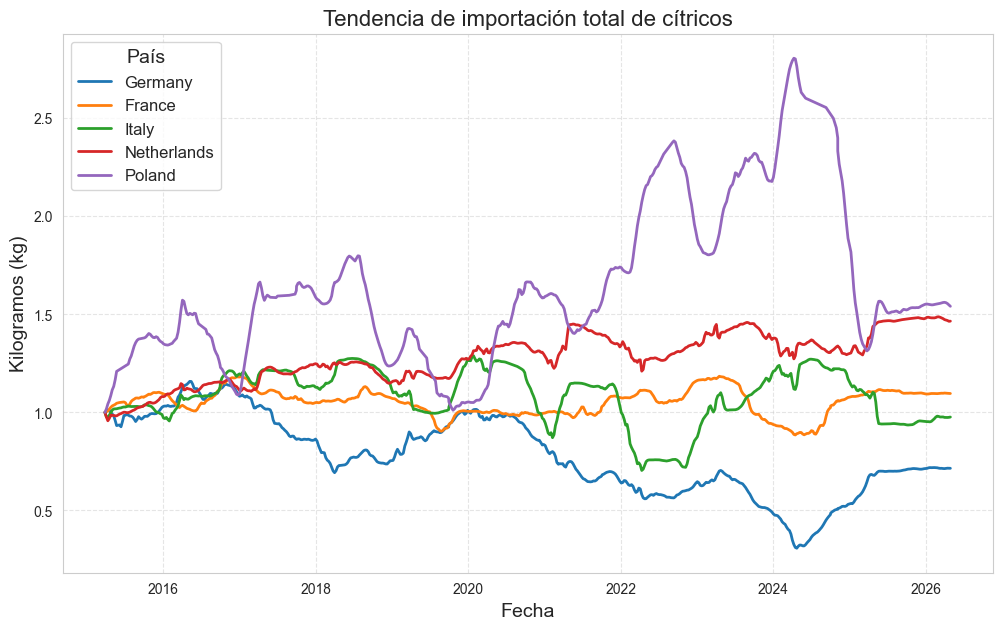

In [108]:
tendencias = {}
for pais in paises_objetivo:
    gra = graficos[pais]
    grafico = gra.copy()

    grafico['Date'] = pd.to_datetime(grafico['Date'])
    grafico = grafico.set_index('Date')
    serie = grafico['kg']

    descomposicion = seasonal_decompose(serie, model='additive', period=52)
    tendencia = descomposicion.trend
    tendencias[pais] = tendencia

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12, 7))

for pais, tendencia in tendencias.items():

    tendencia_norm = tendencia / tendencia.dropna().iloc[0]
    plt.plot(tendencia_norm, label=pais, linewidth=2)

plt.title('Tendencia de importación total de cítricos', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Kilogramos (kg)', fontsize=14)
plt.legend(title='País', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Conclusiones

Estas serían las previsiones de importación total de cítricos a un año vista de cada uno de los páises objetivo. 

# Importación de cítricos por partner

## Entrenamiento de los modelos
Entrenamos un modelo por cada partner de cada país. Los guardamos todos en un diccionario. 

In [42]:
def top_partners(df):
    df = df.groupby('Partner')['kg'].sum().reset_index()
    df = df.sort_values(by='kg', ascending=False)
    top_partners = df['Partner'].head(6).to_list()

    return top_partners

In [78]:
modelo_por_pais = {} # Guardaremos los modelos en este diccionario

for pais in paises_objetivo:
    print(f'MODELO DE PARTNERS DE {pais.upper()}')
    df = pd.read_csv(f'./Countries_citricos_completos/{pais}.csv') # Cargamos el dataset
    modelo_por_pais[pais] = {}

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.groupby(['Año', 'Mes', 'Partner']).agg({
                'kg':'sum',
                **{col: 'first' for col in df.columns if col not in ['Año', 'Mes', 'kg', 'Partner', 'Member State', 'Product']}
                }).reset_index()
    df = df.sort_values('Date', ascending=True) # Ordenamos por fecha
    df.drop(columns=['Euro Value','Unit Value'], inplace=True)
    df = df[df['Partner'].isin(top_partners(df))] # Filtramos los top partners
    df = df.loc[df['kg'] > 1000, :] # Filtramos outliers

    # Creamos el gráfico del país
    #fig, ax = plt.subplots(figsize=(12, 7))

    # Creamos un dataframe para las métricas
    df_metricas = pd.DataFrame({pais:['Desviación estándar de test','RMSE']})
    metricas_partner = {}
                                
    for partner in df['Partner'].unique():
        df_partner = df.loc[df['Partner'] == partner, :].copy()
        df_partner.sort_values('Date', inplace=True)

        df_train = df_partner.loc[df_partner['Date'] < '2023-10-01', :]
        df_test = df_partner.loc[df_partner['Date'] >= '2023-10-01', :]

        X_train = df_train.drop(columns=['Date', 'kg', 'Partner'])
        y_train = df_train['kg']

        X_test = df_test.drop(columns=['Date', 'kg', 'Partner'])
        y_test = df_test['kg']

        modelo = CatBoostRegressor(iterations=1500, depth=6, learning_rate=0.04, loss_function='RMSE', l2_leaf_reg=7, subsample=0.9,
                                   random_seed=42, verbose=False)
        modelo.fit(X_train, y_train)

        modelo_por_pais[pais][partner] = modelo

        y_pred = modelo.predict(X_test)

        if not y_test.empty:
            std_test = y_test.std()
            rmse = root_mean_squared_error(y_test, y_pred)
            #r2 = r2_score(y_test, y_pred)

            metricas_partner[partner] = [std_test, rmse]

            #ax.plot(df_train['Date'], df_train['kg'], label=f'Datos de entrenamiento ({partner})')
            #ax.plot(df_test['Date'], df_test['kg'], label=f'Datos de prueba ({partner})')
            #ax.plot(df_test['Date'], y_pred, linestyle='--', label=f'Predicciones ({partner})')
    
    pd.options.display.float_format = '{:,.2f}'.format
    df_metricas = pd.concat([df_metricas, pd.DataFrame(metricas_partner)], axis=1)
    df_metricas = df_metricas.round(2)
    display(df_metricas)
    #ax.set_title(f'Predicción de kg para {pais}')
    #ax.set_xlabel('Fecha')
    #ax.set_ylabel('Kilogramos (kg)')
    #ax.legend(title='Leyenda', loc='best')
    #ax.grid(True)

    #plt.xticks(rotation=45)
    #plt.tight_layout()
    #plt.show()

MODELO DE PARTNERS DE GERMANY


,Germany,South Africa,China,Israel,Türkiye,Morocco,Egypt
0,Desviación estándar de test,"632,632.80","157,155.27","59,517.52","75,287.73","15,374.40","98,221.49"
1,RMSE,"934,157.84","266,993.95","343,150.45","135,377.11","343,658.29","70,617.73"


MODELO DE PARTNERS DE FRANCE


,France,Colombia,Tunisia,South Africa,Israel,Morocco,Egypt
0,Desviación estándar de test,"123,122.75","878,607.62","1,952,950.41","3,104,594.20","3,170,658.81","2,841,024.71"
1,RMSE,"116,330.16","589,707.21","1,291,289.21","4,297,811.94","1,880,400.87","1,894,680.55"


MODELO DE PARTNERS DE ITALY


,Italy,Egypt,Argentina,Uruguay,Türkiye,Israel,South Africa
0,Desviación estándar de test,"2,863,860.28","905,670.02","285,841.46","424,100.32","238,496.95","7,745,833.41"
1,RMSE,"2,255,932.94","2,090,940.17","572,099.27","460,692.05","178,726.66","4,889,121.52"


MODELO DE PARTNERS DE NETHERLANDS


,Netherlands,Argentina,Zimbabwe,South Africa,China,Morocco,Egypt
0,Desviación estándar de test,"2,599,516.44","4,115,297.70","48,727,891.78","5,887,626.65","2,660,183.92","19,062,777.20"
1,RMSE,"4,537,285.95","4,055,570.12","40,118,412.75","4,336,436.41","2,165,501.79","7,358,655.76"


MODELO DE PARTNERS DE POLAND


No objects info loaded


,Poland,China,Türkiye,Egypt,Albania,Vietnam
0,Desviación estándar de test,"181,543.94","3,977,818.22","205,482.43","878,852.10","56,084.60"
1,RMSE,"406,533.00","4,645,585.69","143,100.09","772,295.00","99,199.13"


## Predicciones de temperatura y precipitación
Aquí creamos una función para predecir los datos de temperatura y precipitación teniendo en cuenta el cambio climático. 

In [87]:
def prevision_clima_partners(df):
    # Extraemos el histórico de datos de clima
    df_clima = df.copy()
    df_clima = df_clima[['Semana', 'Mes', 'Temperatura', 'Precipitación']]

    fechas_futuras = pd.date_range(start='2024-11-11', end='2026-12-11', freq='W')

    # Creamos un dataframe para las previsiones a 1 año vista
    df_prevision_clima = pd.DataFrame({'Date': fechas_futuras})
    df_prevision_clima['Semana'] = df_prevision_clima['Date'].dt.isocalendar().week
    df_prevision_clima['Mes'] = df_prevision_clima['Date'].dt.month
    df_prevision_clima['Año'] = df_prevision_clima['Date'].dt.year

    # Calculamos las medias de cada mes durante los años disponibles
    medias_temperatura = df_clima.groupby('Mes')['Temperatura'].mean()
    medias_precipitacion = df_clima.groupby('Mes')['Precipitación'].mean()

    # Asignamos las medias a las previsiones
    df_prevision_clima['Temperatura'] = df_prevision_clima['Mes'].map(medias_temperatura)
    df_prevision_clima['Precipitación'] = df_prevision_clima['Mes'].map(medias_precipitacion)

    # Definimos cómo cambiarán las temperaturas y precipitaciones
    ajustes_temperatura = {
        2025: {1: 0.4, 2: 0.3, 3: 0.4, 4: 0.7, 5: 1.0, 6: 0.6, 7: 1.2, 8: 1.1, 9: 0.2, 10: -0.2, 11: -0.1, 12: 0.4},
        2026: {1: 0.8, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.4, 6: 1.2, 7: 1.2, 8: 1.0, 9: 0.4, 10: 0.2, 11: 0.6, 12: -0.3}
    }

    ajustes_precipitacion = {
        2025: {1: -10, 2: -15, 3: -20, 4: 13, 5: -14, 6: -18, 7: -23, 8: -20, 9: 10, 10: 16, 11: -5, 12: -8},
        2026: {1: -5, 2: -14, 3: 10, 4: 18, 5: -10, 6: -23, 7: -20, 8: -15, 9: 15, 10: 13, 11: 5, 12: -10}
    }

    # Aplicamos los ajustes manuales y añadimos un pequeño ruido aleatorio para mayor realismo
    for year in [2025, 2026]:
        for month in range(1, 13):
            df_prevision_clima.loc[
                (df_prevision_clima['Año'] == year) & (df_prevision_clima['Mes'] == month), 'Temperatura'
            ] += ajustes_temperatura[year][month] + np.random.uniform(-0.2, 0.2)

            df_prevision_clima.loc[
                (df_prevision_clima['Año'] == year) & (df_prevision_clima['Mes'] == month), 'Precipitación'
            ] += ajustes_precipitacion[year][month] + np.random.uniform(-10, 10)
    
    return df_prevision_clima


## Predicciones demográficas y de PIB per capita
Aquí vamos a crear una función para predecir los valores anuales de las variables demográficas y de PIB per capita. Haremos uso de un modelo de regresión lineal.

In [86]:
def prevision_demo_partners(df):
   df_demo = df.copy()
   df_demo = df_demo[['Año','Fem. Niños (5-14 años)',
       'Fem. Adolescentes (15-19 años)', 'Fem. Adultos jóvenes (20-34 años)',
       'Fem. Adultos medios (35-54 años)', 'Fem. Adultos mayores (55-74 años)',
       'Fem. Ancianos (75+ años)', 'Masc. Niños (5-14 años)',
       'Masc. Adolescentes (15-19 años)', 'Masc. Adultos jóvenes (20-34 años)',
       'Masc. Adultos medios (35-54 años)',
       'Masc. Adultos mayores (55-74 años)', 'Masc. Ancianos (75+ años)',
       'PIB per capita']]

   fechas_futuras = pd.date_range(start='2024-11-11', end='2026-12-11', freq='W')

   # Creamos un dataframe para las previsiones a 1 año vista
   df_prevision_demo = pd.DataFrame({'Date': fechas_futuras})
   df_prevision_demo['Semana'] = df_prevision_demo['Date'].dt.isocalendar().week
   df_prevision_demo['Mes'] = df_prevision_demo['Date'].dt.month
   df_prevision_demo['Año'] = df_prevision_demo['Date'].dt.year

    
   datos_anuales = df_demo.groupby('Año').mean().reset_index()

   variables = datos_anuales.columns.difference(['Año'])

   for variable in variables:
      X = datos_anuales[['Año']]
      y = datos_anuales[variable]

      modelo = LinearRegression()
      modelo.fit(X, y)

      df_prevision_demo[variable] = modelo.predict(df_prevision_demo[['Año']])

   df_prevision_demo = df_prevision_demo.round(0)
   
   return df_prevision_demo


## Previsiones de importación por partner
Usamos los modelos entrenados para hacer las previsiones de importación de cada país con respecto a cada uno de sus partners. 

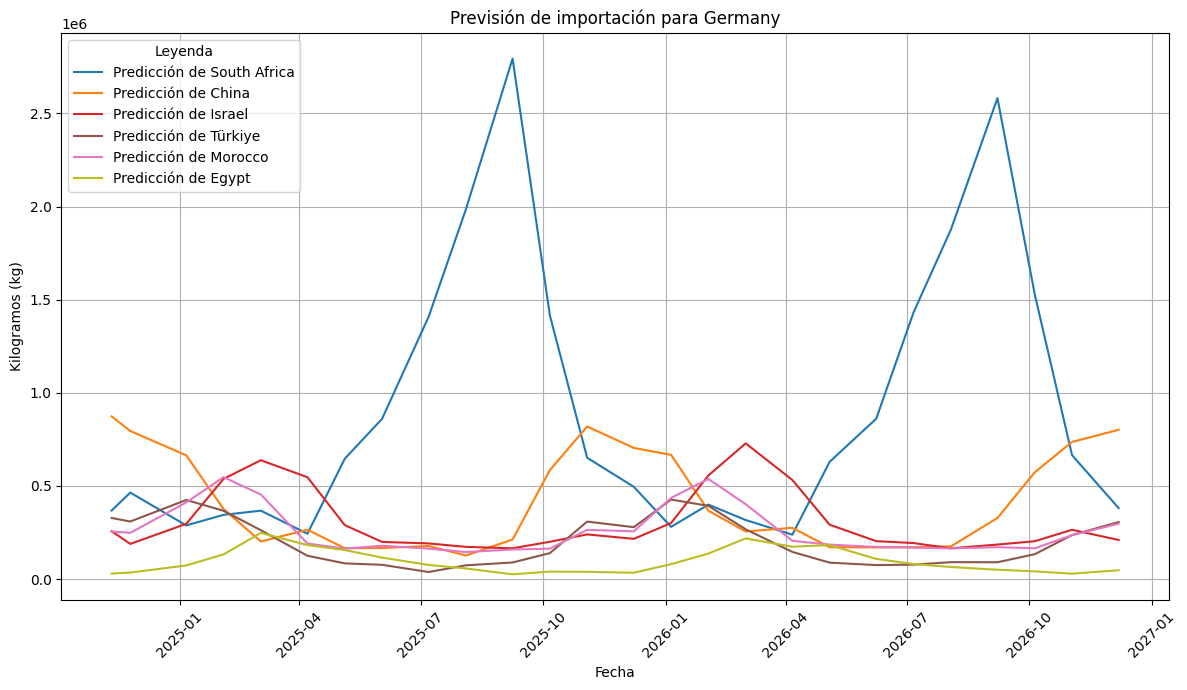

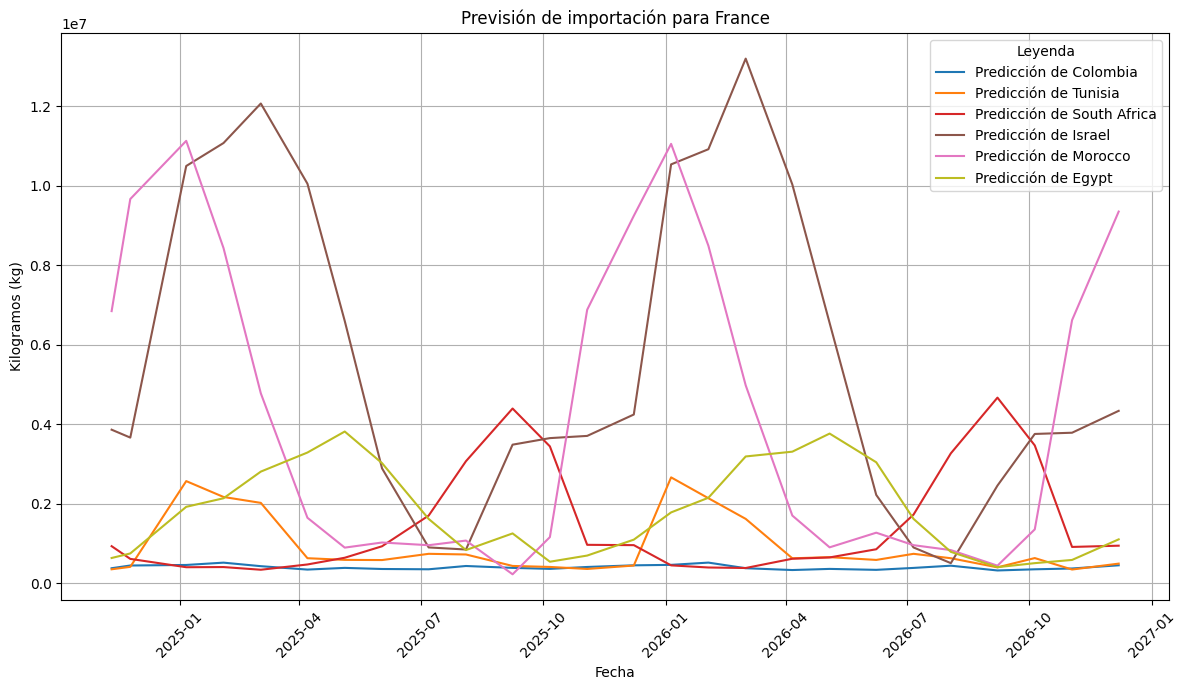

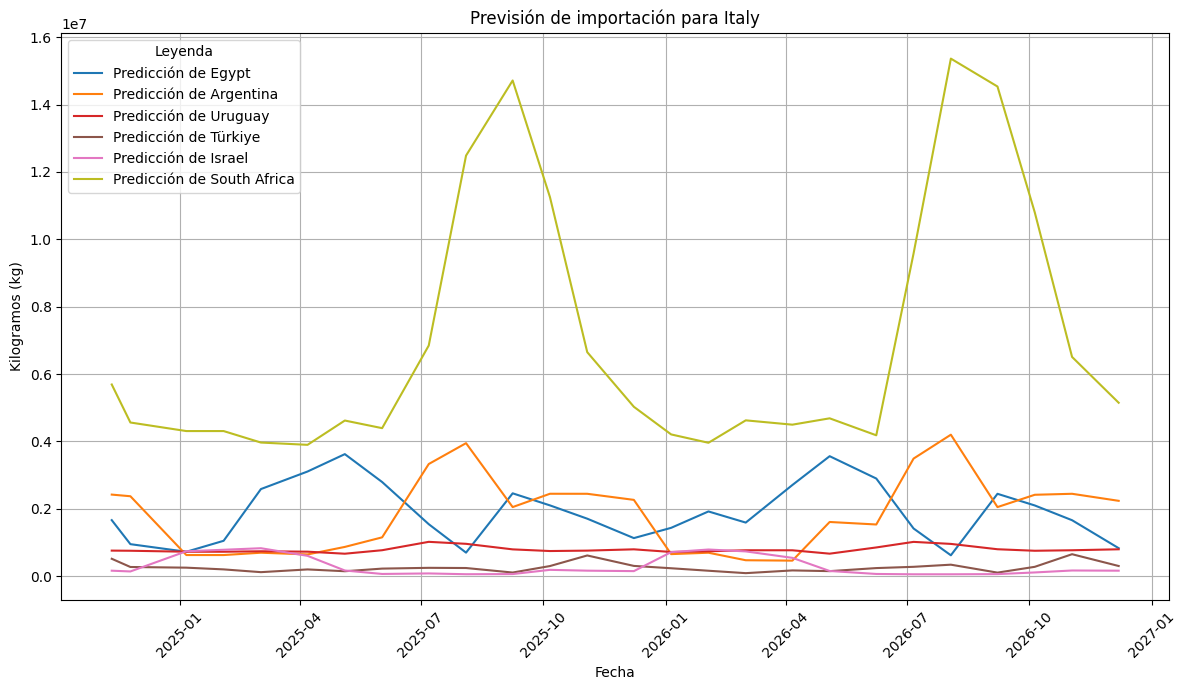

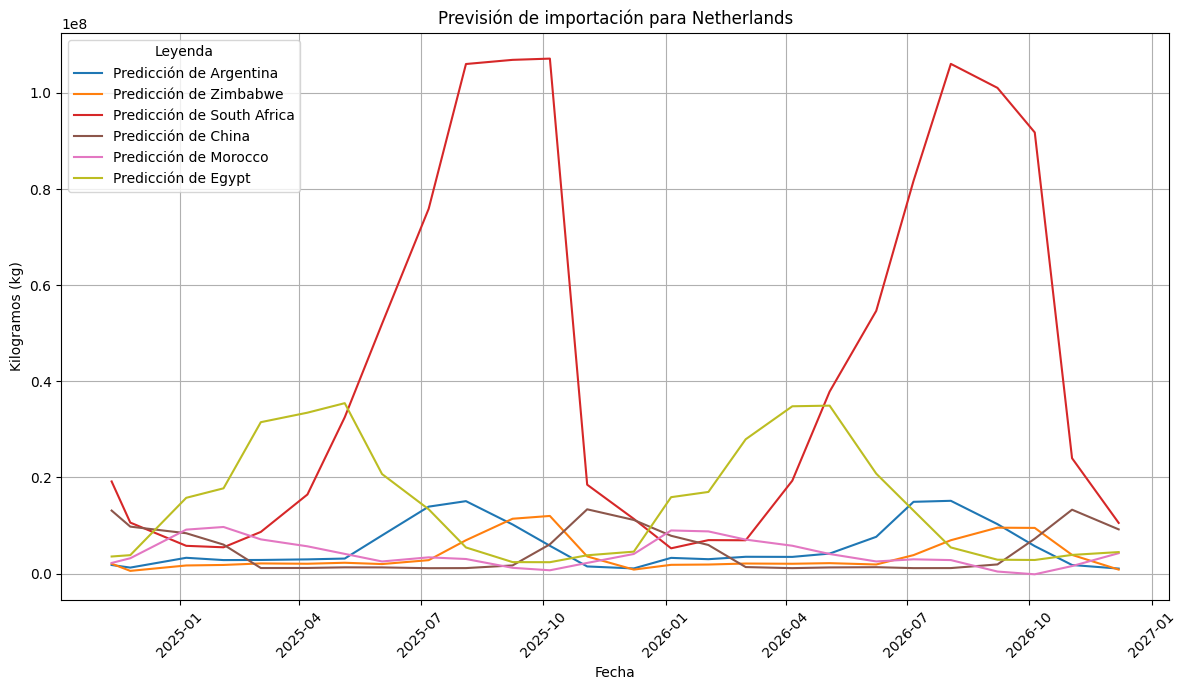

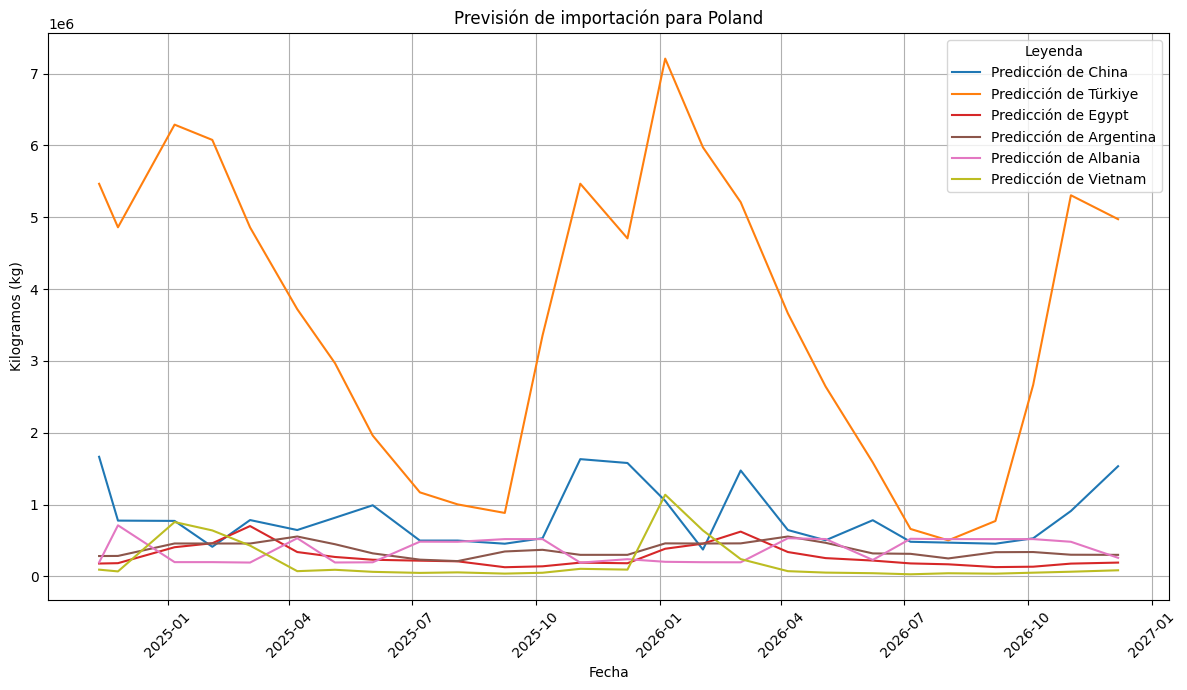

In [88]:
graficos_partner = {} # Guardaremos los gráficos en este diccionario

for pais in paises_objetivo:
    df = pd.read_csv(f'./Countries_citricos_completos/{pais}.csv') # Cargamos los datos del país
    
    clima_pred = prevision_clima_partners(df) # Predecimos el clima
    demo_pred = prevision_demo_partners(df) # Predecimos la demografía
    clima_pred.drop(columns=['Date'], inplace=True)
    demo_pred.drop(columns=['Date'], inplace=True)
    
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.groupby(['Año', 'Mes', 'Partner']).agg({
                'kg':'sum',
                **{col: 'first' for col in df.columns if col not in ['Año', 'Mes', 'kg', 'Partner', 'Member State', 'Product']}
                }).reset_index()
    df = df.sort_values('Date', ascending=True) # Ordenamos por fecha
    df.drop(columns=['Euro Value','Unit Value'], inplace=True)

    df = df[df['Partner'].isin(top_partners(df))] # Filtramos los top partners
    df = df.loc[df['kg'] > 1000, :] # Filtramos outliers

    
    # Creamos el dataframe con las previsiones de clima y demografía
    X_futuro = clima_pred.merge(demo_pred, on=['Semana', 'Mes', 'Año'])
    X_futuro = X_futuro[['Precipitación','Temperatura','Fem. Adolescentes (15-19 años)', 'Fem. Adultos jóvenes (20-34 años)',
       'Fem. Adultos mayores (55-74 años)', 'Fem. Adultos medios (35-54 años)',
       'Fem. Ancianos (75+ años)', 'Fem. Niños (5-14 años)',
       'Masc. Adolescentes (15-19 años)', 'Masc. Adultos jóvenes (20-34 años)',
       'Masc. Adultos mayores (55-74 años)',
       'Masc. Adultos medios (35-54 años)', 'Masc. Ancianos (75+ años)',
       'Masc. Niños (5-14 años)', 'PIB per capita','Mes','Semana','Año']] # Reordenamos las columnas
    
    X_futuro = X_futuro.groupby(['Año','Mes']).agg('first').reset_index()
    
    fig, ax = plt.subplots(figsize=(12, 7))
    colores = {}
    cmap = plt.get_cmap('tab10')
    partners = df['Partner'].unique()
    for i, partner in enumerate(partners):
        colores[partner] = cmap(i / len(partners))

    predicciones_pais = []

    for partner in df['Partner'].unique():
        modelo = modelo_por_pais[pais][partner] # Seleccionamos el modelo del partner
        df_partner = df.loc[df['Partner'] == partner, :].copy()
        df_partner.sort_values('Date', inplace=True)
        
        y_futuro = modelo.predict(X_futuro)

        #y_futuro = np.insert(y_futuro, 0, df['kg'].iloc[-1]) # Añadimos el último valor histórico

        X_futuro['Date'] = pd.to_datetime(X_futuro['Año'].astype(str) + X_futuro['Semana'].astype(str) + '1', format='%Y%W%w')
    
        #fechas = X_futuro['Fecha'].to_numpy()
        #primera_fecha = df_partner['Date'].iloc[-1]
        #fechas = np.insert(fechas, 0, primera_fecha) # Añadimos la última fecha histórica

        #ax.plot(df_partner['Date'], df_partner['kg'], color=colores[partner], label=f'Histórico de {partner}')
        ax.plot(X_futuro['Date'], y_futuro, color=colores[partner], label=f'Predicción de {partner}')

        # Guardamos las predicciones en una lista
        predicciones_pais.append(pd.DataFrame({
            'País': pais,
            'Partner': partner,
            'Date': X_futuro['Date'],
            'kg': y_futuro
        }))
     
        ax.legend(title='Leyenda', loc='best')
        ax.grid(True)

    ax.set_title(f'Previsión de importación para {pais}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Kilogramos (kg)')

    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show() 

    # Guardamos las predicciones en el diccionario
    graficos_partner[pais] = pd.concat(predicciones_pais, ignore_index=True)


## Extracción de tendencias

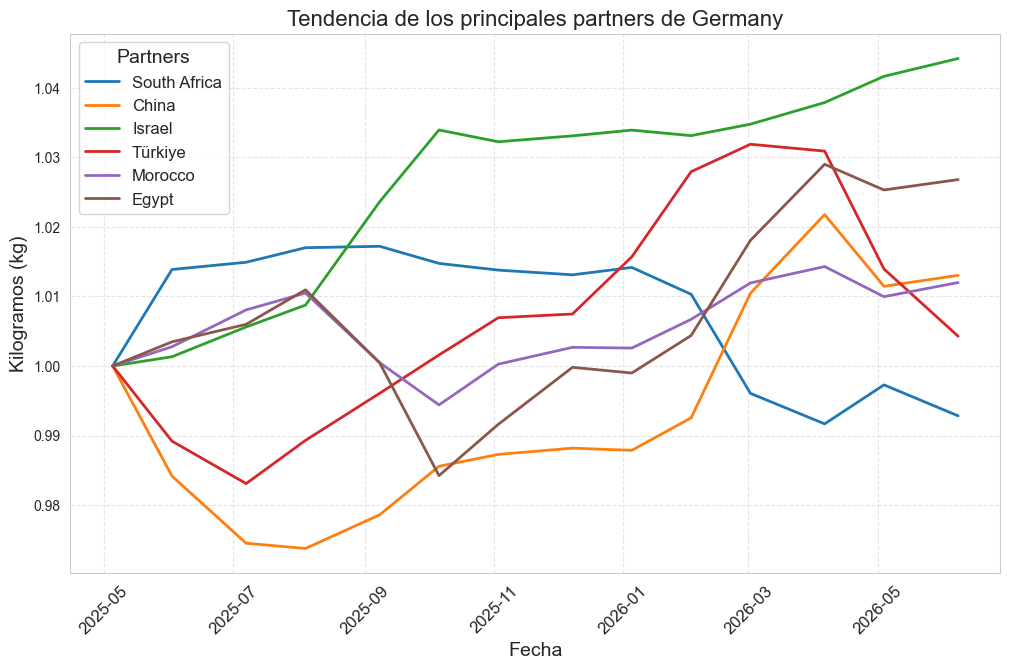

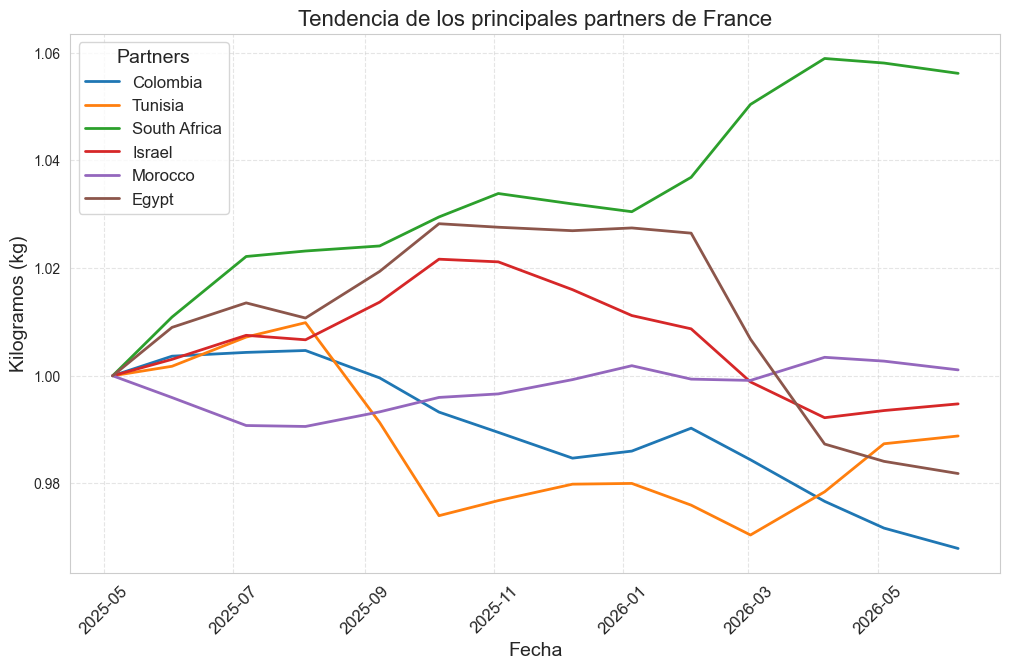

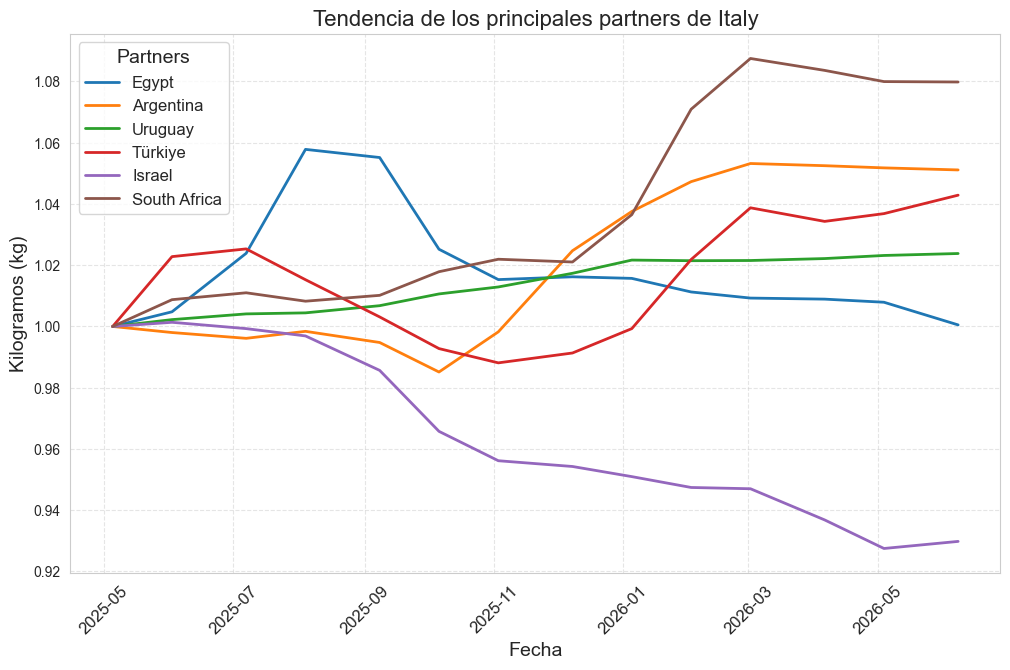

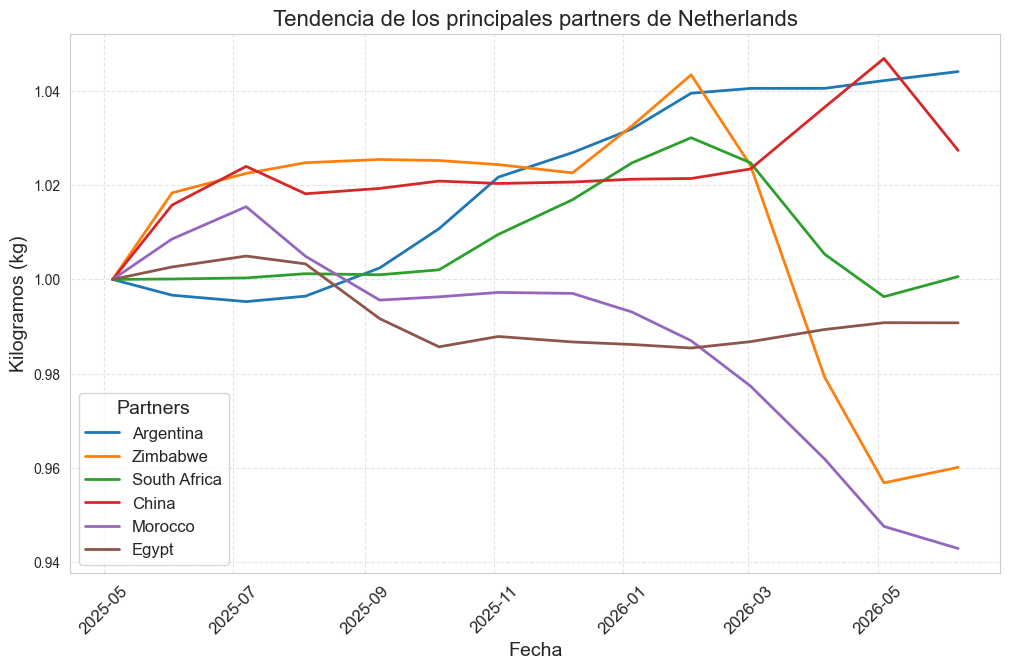

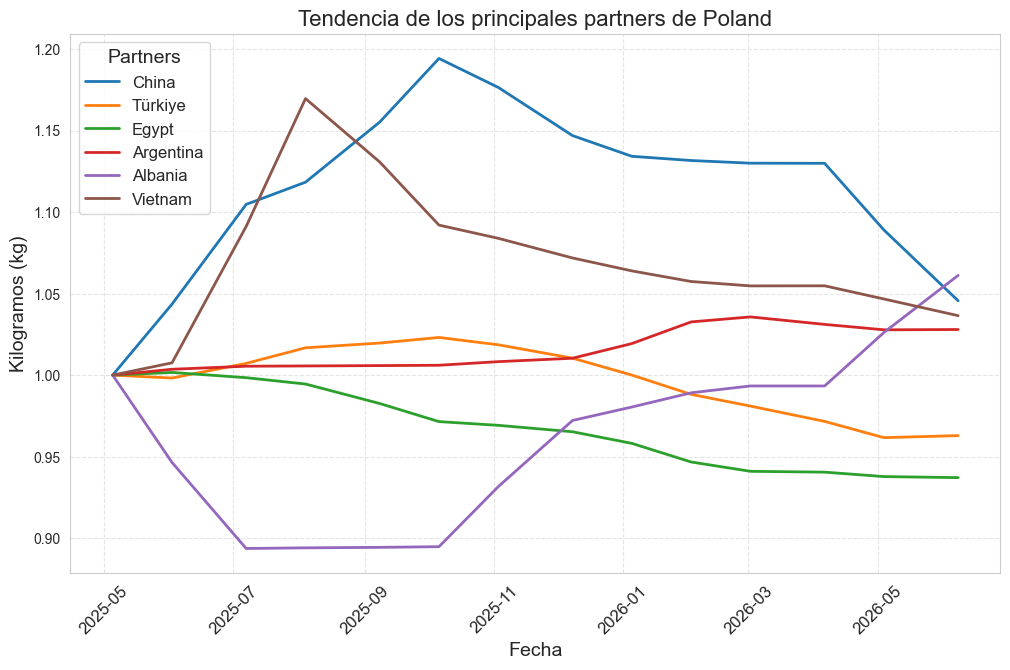

In [107]:
tendencias = {}

for pais in paises_objetivo:
    gra = graficos_partner[pais]
    grafico = gra.copy()
    
    grafico['Date'] = pd.to_datetime(grafico['Date'])
    grafico = grafico.set_index('Date')
    
    partners = grafico['Partner'].unique()
    tendencias[pais] = {}
    
    for partner in partners:
        serie = grafico[grafico['Partner'] == partner]['kg']
        
        # Aplicamos la descomposición estacional
        descomposicion = seasonal_decompose(serie, model='additive', period=12)
        tendencia = descomposicion.trend
        
        # Guardamos la tendencia
        tendencias[pais][partner] = tendencia

# Graficamos las tendencias para cada país
sns.set_style("whitegrid")
colors = plt.cm.tab10.colors

for pais, partners_tendencias in tendencias.items():
    fig, ax = plt.subplots(figsize=(12, 7))
    
    for (partner, tendencia), color in zip(partners_tendencias.items(), colors):
        if tendencia.isna().all():
            continue  # Si toda la serie es NaN, la ignoramos
        
        tendencia_norm = tendencia / tendencia.dropna().iloc[0]  # Normalizamos la tendencia
        ax.plot(tendencia_norm, label=partner, linewidth=2, color=color)
    
    ax.set_title(f'Tendencia de los principales partners de {pais}', fontsize=16)
    ax.set_xlabel('Fecha', fontsize=14)
    ax.set_ylabel('Kilogramos (kg)', fontsize=14)   
    ax.legend(title='Partners', fontsize=12, title_fontsize=14)
    ax.grid(True, linestyle="--", alpha=0.5)
    plt.xticks(fontsize=12, rotation=45)
    
    plt.show()


## Conclusiones

Estas serían las previsiones de importación de cítricos de cada partner para cada uno de los países estudiados. 